# SVD Applied to a Word-Document Matrix

This notebook applies the SVD to a simple word-document matrix. The aim is to see what the reconstructed reduced dimension matrix looks like.

In [22]:
#import pandas for conviently labelled arrays
import pandas
# import numpy for SVD function
import numpy
# import matplotlib.pyplot for visualising arrays
import matplotlib.pyplot as plt

## A Slightly Bigger Word-Document Matrix
The example word-document matrix is taken from http://makeyourowntextminingtoolkit.blogspot.co.uk/2016/11/so-many-dimensions-and-how-to-reduce.html but expanded to cover a 3rd topic related to a home or house

In [23]:
# create a simple word-document matrix as a pandas dataframe, the content values have been normalised
words = ['wheel', ' seat', ' engine', ' slice', ' oven', ' boil', 'door', 'kitchen', 'roof']
print(words)
documents = ['doc1', 'doc2', 'doc3', 'doc4', 'doc5', 'doc6', 'doc7', 'doc8', 'doc9']
word_doc = pandas.DataFrame([[0.5,0.3333, 0.25, 0, 0, 0, 0, 0, 0],
                      [0.25, 0.3333, 0, 0, 0, 0, 0, 0.25, 0],
                      [0.25, 0.3333, 0.75, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0.5, 0.5, 0.6, 0, 0, 0],
                      [0, 0, 0, 0.3333, 0.1667, 0, 0.5, 0, 0],
                      [0, 0, 0, 0.1667, 0.3333, 0.4, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0.25, 0.25],
                      [0, 0, 0, 0, 0, 0, 0.5, 0.25, 0.25],
                      [0, 0, 0, 0, 0, 0, 0, 0.25, 0.5]], index=words, columns=documents)
# and show it
word_doc

['wheel', ' seat', ' engine', ' slice', ' oven', ' boil', 'door', 'kitchen', 'roof']


,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9
wheel,0.50,0.3333,0.25,0.0000,0.0000,0.0,0.0,0.00,0.00
seat,0.25,0.3333,0.00,0.0000,0.0000,0.0,0.0,0.25,0.00
engine,0.25,0.3333,0.75,0.0000,0.0000,0.0,0.0,0.00,0.00
slice,0.00,0.0000,0.00,0.5000,0.5000,0.6,0.0,0.00,0.00
oven,0.00,0.0000,0.00,0.3333,0.1667,0.0,0.5,0.00,0.00
boil,0.00,0.0000,0.00,0.1667,0.3333,0.4,0.0,0.00,0.00
door,0.00,0.0000,0.00,0.0000,0.0000,0.0,0.0,0.25,0.25
kitchen,0.00,0.0000,0.00,0.0000,0.0000,0.0,0.5,0.25,0.25
roof,0.00,0.0000,0.00,0.0000,0.0000,0.0,0.0,0.25,0.50


## Word-Document Matrix is A

In [24]:
# create a numpy array from the pandas dataframe
A = word_doc.values

## Now Take the SVD

In [25]:
# break it down into an SVD
U, s, VT = numpy.linalg.svd(A, full_matrices=False)
S = numpy.diag(s)

In [26]:
# what are U, S and V
print("U =\n", numpy.round(U, decimals=2), "\n")
print("S =\n", numpy.round(S, decimals=2), "\n")
print("V^T =\n", numpy.round(VT, decimals=2), "\n")

U =
 [[-0.01  0.57 -0.05  0.01 -0.45 -0.49 -0.43  0.2   0.07]
 [-0.01  0.31  0.13  0.19 -0.64  0.43  0.42 -0.26 -0.1 ]
 [-0.02  0.76 -0.11 -0.11  0.58  0.2   0.15 -0.06 -0.02]
 [-0.81 -0.03 -0.18  0.17  0.01 -0.07  0.16  0.31 -0.39]
 [-0.33  0.    0.35 -0.64 -0.06 -0.32  0.35 -0.2   0.29]
 [-0.46 -0.02 -0.12  0.16  0.02  0.28 -0.44 -0.43  0.53]
 [-0.02  0.03  0.32  0.35  0.07  0.08  0.24  0.59  0.6 ]
 [-0.1   0.04  0.68 -0.22  0.02  0.39 -0.45  0.19 -0.3 ]
 [-0.03  0.04  0.49  0.56  0.23 -0.43  0.05 -0.42 -0.16]] 

S =
 [[ 1.11  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.06  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.84  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.62  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.46  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.22  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.19  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.06  0.  ]
 [ 0.    0.    0. 

We can see above that the values in the diagonal **S** matrix are ordered by magnitide. There is a significant different between the biggest value 1.1, and the smallest 0.05. The halfway value of 0.28 is still much smaller than the largest.

## Check U, S and V Do Actually Reconstruct A

In [27]:
# rebuild A2 from U.S.V
A2 = numpy.dot(U,numpy.dot(S,VT))
print("A2 =\n", numpy.round(A2, decimals=2))

A2 =
 [[ 0.5   0.33  0.25  0.    0.   -0.    0.   -0.   -0.  ]
 [ 0.25  0.33  0.   -0.    0.    0.    0.    0.25  0.  ]
 [ 0.25  0.33  0.75  0.    0.   -0.    0.    0.    0.  ]
 [-0.    0.   -0.    0.5   0.5   0.6  -0.    0.   -0.  ]
 [ 0.    0.   -0.    0.33  0.17 -0.    0.5   0.    0.  ]
 [-0.    0.   -0.    0.17  0.33  0.4  -0.    0.   -0.  ]
 [-0.   -0.    0.   -0.   -0.   -0.    0.    0.25  0.25]
 [ 0.    0.   -0.   -0.   -0.   -0.    0.5   0.25  0.25]
 [-0.   -0.    0.   -0.   -0.   -0.    0.    0.25  0.5 ]]


Yes, that worked .. the reconstructed A2 is the same as the original A (within the bounds of small floating point accuracy)

## Now Reduce Dimensions, Extract Topics
Here we use only the top 3 values of the **S** singular value matrix, pretty brutal reduction in dimensions!

Why 3, and not 2?

We'll only plot 2 dimensions for the document cluster view, and later we'll use 3 dimensions for the topic word view

In [28]:
# S_reduced is the same as S but with only the top 3 elements kept
S_reduced = numpy.zeros_like(S)
# only keep top two eigenvalues
l = 3
S_reduced[:l, :l] = S[:l,:l]
# show S_rediced which has less info than original S
print("S_reduced =\n", numpy.round(S_reduced, decimals=2))

S_reduced =
 [[ 1.11  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.06  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.84  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


## New View Of Documents

In [29]:
# what is the document matrix now?
S_reduced_VT = numpy.dot(S_reduced, VT)
print("S_reduced_VT = \n", numpy.round(S_reduced_VT, decimals=2))

S_reduced_VT = 
 [[-0.01 -0.01 -0.01 -0.59 -0.62 -0.67 -0.22 -0.04 -0.04]
 [ 0.55  0.55  0.71 -0.02 -0.02 -0.02  0.02  0.11  0.04]
 [-0.02 -0.01 -0.09  0.01 -0.07 -0.16  0.51  0.4   0.49]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


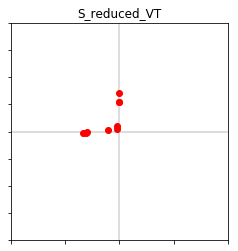

In [30]:
# plot the array
p = plt.subplot(111)
p.axis('scaled'); p.axis([-2, 2, -2, 2]); p.axhline(y=0, color='lightgrey'); p.axvline(x=0, color='lightgrey')
p.set_yticklabels([]); p.set_xticklabels([])

p.set_title("S_reduced_VT")
p.plot(S_reduced_VT[0,],S_reduced_VT[1,],'ro')

plt.show()

The above shows that there are indeed 3 **clusters** of documents. That matches our expectations as we constructed the example data set that way.

## Topics from New View of Words

In [31]:
# topics are a linear combination of original words
U_S_reduced = numpy.dot(U, S_reduced)
df = pandas.DataFrame(numpy.round(U_S_reduced, decimals=2), index=words)

# show colour coded so it is easier to see significant word contributions to a topic
df.style.background_gradient(cmap=plt.get_cmap('Blues'), low=0, high=2)

The above shows that the 2 new axes are linear combinations of existing words:
* topic 1 is mostly **slice** and some **boil**
* topic 2 is mostly **engine** and some **wheel**
* topic 3 is mostly **kitchen** and some **roof**